In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('height-weight.csv')
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [3]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


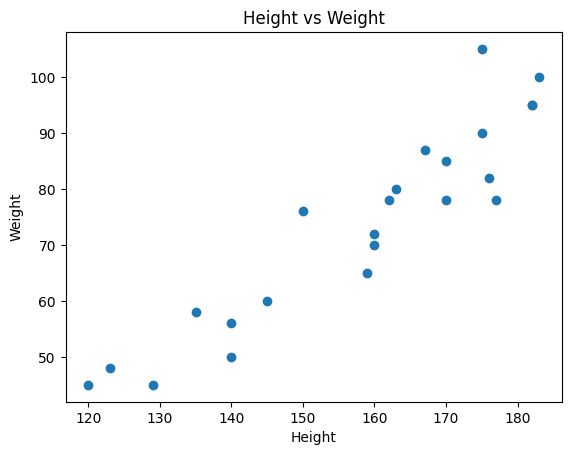

In [4]:
## scatter plot
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

<Axes: >

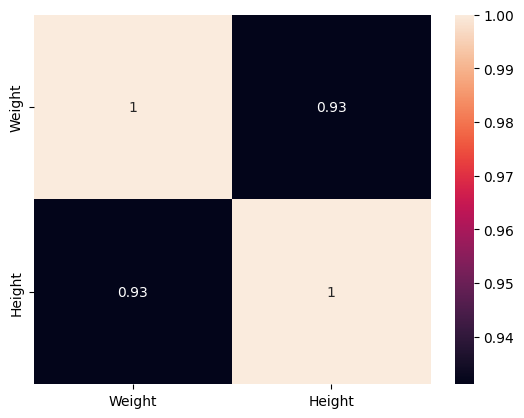

In [5]:
sns.heatmap(df.corr(),annot=True)

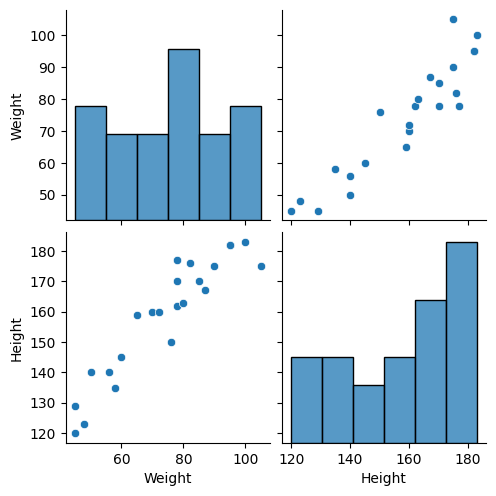

In [6]:
sns.pairplot(df)

In [7]:
# divide into dependent and independent features
X,Y=df[['Weight']],df['Height']
# X should always be more than 1 dimension
# Y can be single dimension

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [11]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_hat=linreg.predict(x_test)

In [12]:
print("The slope or coefficient of weight is ",linreg.coef_)
print("Intercept:",linreg.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


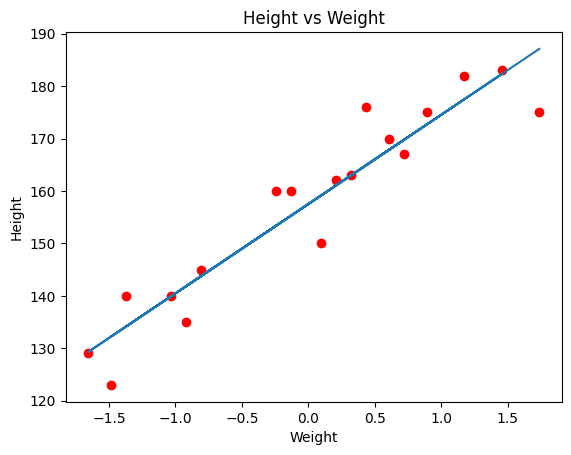

In [13]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,linreg.predict(x_train))
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_hat)
mse=mean_squared_error(y_test,y_hat)
r2=r2_score(y_test,y_hat)

In [15]:
print(f"MSE: {mse}\nMAE: {mae}\nR-square: {r2}")

MSE: 109.77592599051664
MAE: 9.822657814519232
R-square: 0.776986986042344


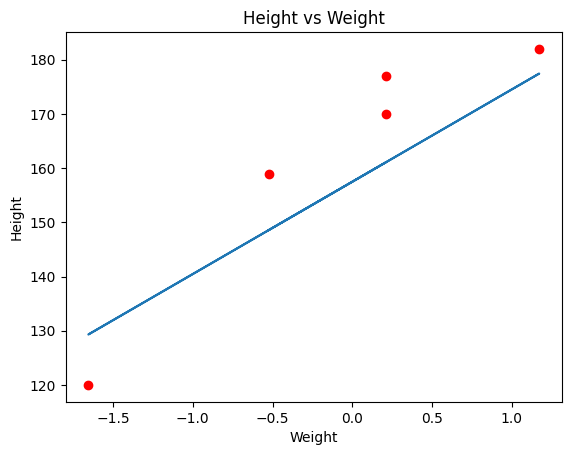

In [16]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_hat)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')
plt.show()

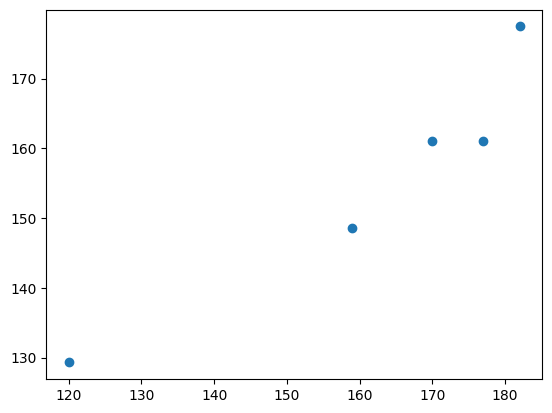

In [17]:
plt.scatter(y_test,y_hat)

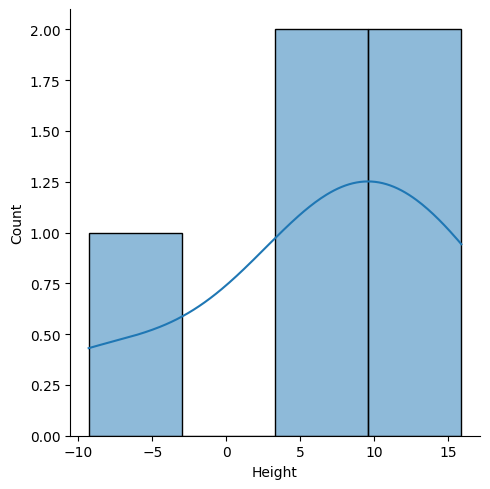

In [22]:
residuals=y_test-y_hat
sns.displot(residuals,kde=True)

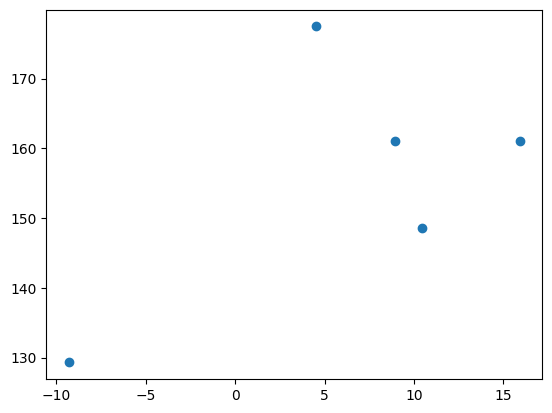

In [23]:
plt.scatter(residuals,y_hat)